## Fill Betweenx Demo

Using [fill_betweenx](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.fill_betweenx.html#matplotlib.axes.Axes.fill_betweenx) to color along the horizontal direction between two curves.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Example data
y = np.arange(0.0, 2, 0.01)
x1 = np.sin(2 * np.pi * y)
x2 = 1.2 * np.sin(4 * np.pi * y)

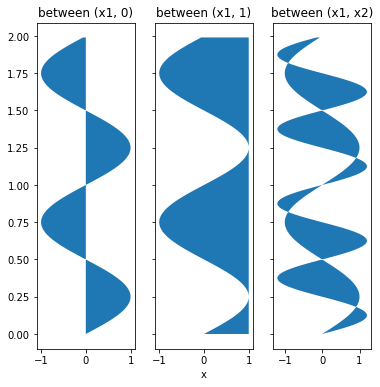

In [4]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(6, 6))

ax1.fill_betweenx(y, 0, x1)
ax1.set_title('between (x1, 0)')

ax2.fill_betweenx(y, x1, 1)
ax2.set_title('between (x1, 1)')
ax2.set_xlabel('x')

ax3.fill_betweenx(y, x1, x2)
ax3.set_title('between (x1, x2)')

plt.show()

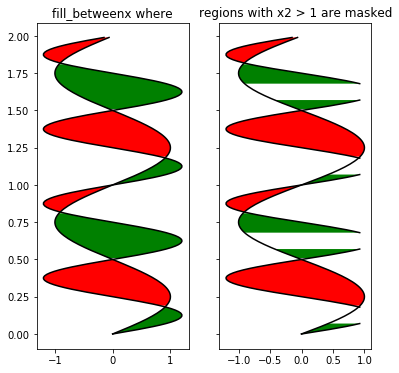

In [5]:
# now fill between x1 and x2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(y[where], x1[where], x2[where])
# because of edge effects over multiple contiguous regions.

fig, [ax, ax1] = plt.subplots(1, 2, sharey=True, figsize=(6, 6))
ax.plot(x1, y, x2, y, color='black')
ax.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax.set_title('fill_betweenx where')

# Test support for masked arrays.
x2 = np.ma.masked_greater(x2, 1.0)
ax1.plot(x1, y, x2, y, color='black')
ax1.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax1.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax1.set_title('regions with x2 > 1 are masked')

# This example illustrates a problem; because of the data
# gridding, there are undesired unfilled triangles at the crossover
# points.  A brute-force solution would be to interpolate all
# arrays to a very fine grid before plotting.

plt.show()